<a href="https://colab.research.google.com/github/LucasCastroPadilha/Car_sale/blob/main/Car_sale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos fazer um estudo sobre venda de carros num lugar muito específico: Ucrania (haha). Nesse caso vamos utilizar um dataframe de 2016, que é um pouco mais atual do que outros que encontrados no Kaggle.

Esse conjunto de dados pode ter diversas anomalias como valores faltantes ou Outliers, o que me proporcionará uma análise exploratória bem completa e abrangente.

É importante lembrar que com certeza teremos outliers, uma vez que estamos tratando de um DataSet que contei carros de passeio populares e carros de luxo.

Então, mesmo encontrando os infames 'Pontos Fora da Curva', deixaremos eles na base.

In [1]:
#Vamos importar nossos pacotes.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
sns.set_theme(style='darkgrid')
from bokeh.plotting import figure, output_file, show
from scipy.stats import mode

In [2]:
#Estava obtendo um erro de codificação UTF-8 ao importar esse dataset CSV.
#Utilizei o argumento "engine='python'" para poder ler corretamente o arquivo.
df = pd.read_csv('/content/drive/MyDrive/Projeto car sale/car_ad.csv', engine="python", encoding ='latin1')

In [3]:
#Primeiros registros do nosso Dataframe
df.head(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.0,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


In [4]:
 #Descobrindo se há algum valor nulo em nossos dados.
 df.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

Descobrimos que nossa base de dados possui alguns valores faltantes. Isso pode ser um problema para nossa Predição futura, então trataremos destes valores.

In [5]:
#Vamos começar pela média dos valores de 'engV', que foi 2.6
df['engV'].fillna(df['engV'].mean(), inplace=True)

In [6]:
#Depois usei a moda da coluna Drive, que acabou sendo 'front'
df['drive'].fillna(mode(df['drive']).mode[0], inplace=True)

In [7]:
#Vamos ver se sobrou algum vaor null
df.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

Vamos ver se alguma variável tem relação positiva ou negativa com outra.

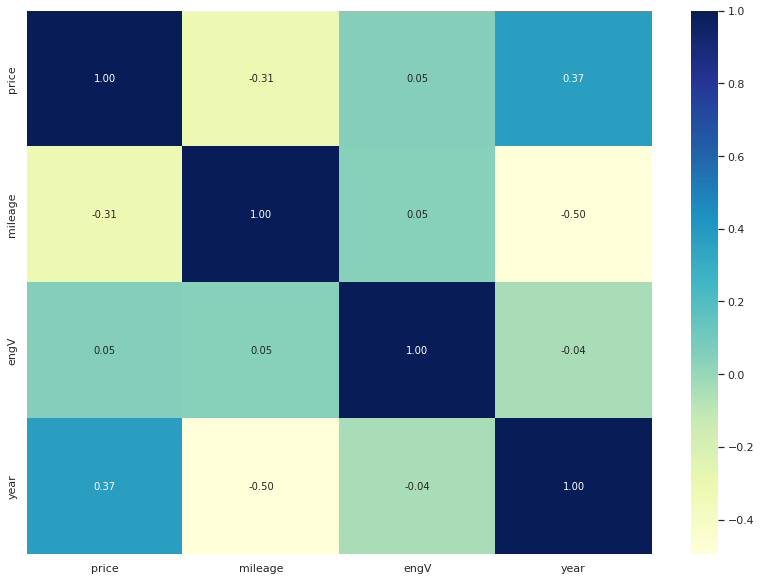

In [8]:
plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='YlGnBu',  )


Como podemos ver, a maior correlação que temos é com os valores de Price e Year.

Vamos usar um grafico de dispersão para visualizar melhor essa relação.

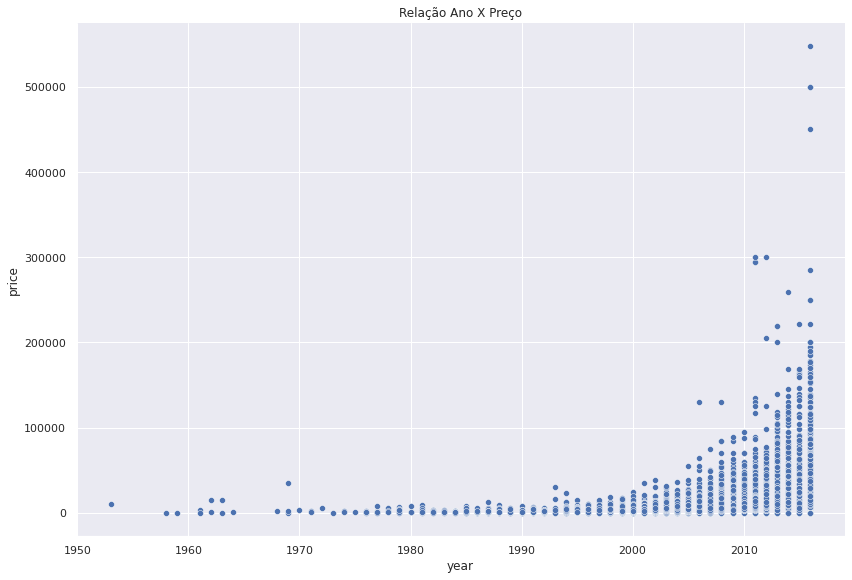

In [ ]:
sns.relplot(x='year', y='price', data=df, height=8, aspect=1.5)
plt.title('Relação Ano X Preço');

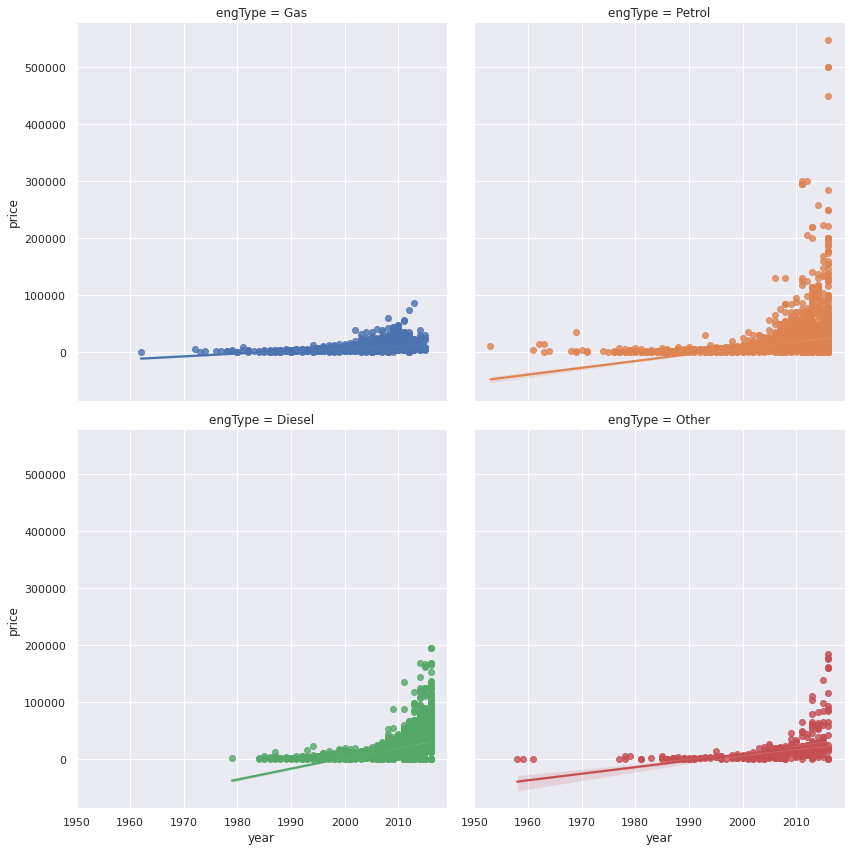

In [ ]:
sns.lmplot(x='year', y='price', hue='engType', col='engType', data=df, col_wrap=2, height=6)
plt.show()

Nas plotagens acima, com linhas de regressão, podemos ter uma ideia da progressão do aumento do consumo dos veículos de acordo com o combustível que ele usa.

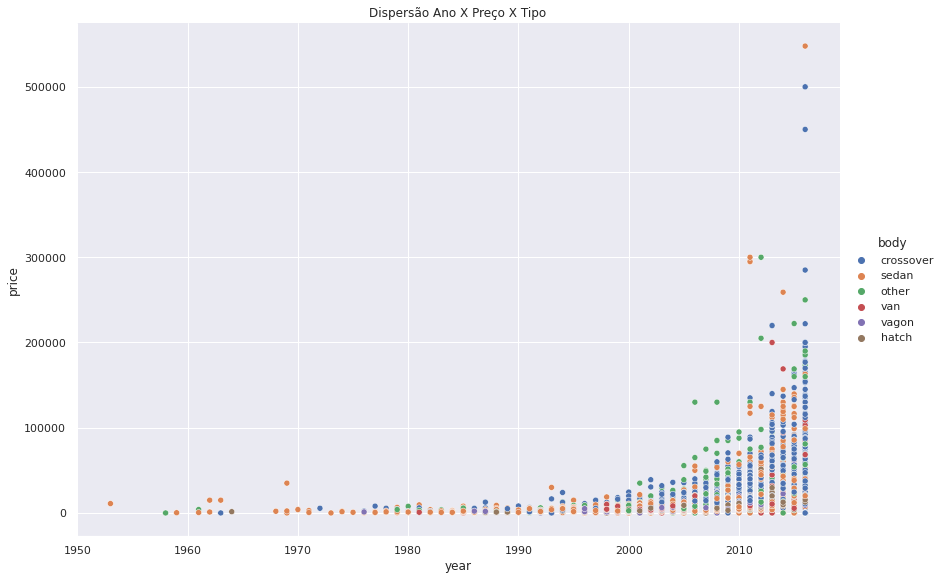

In [ ]:
#Relação de carros por Ano, Preço e Tipo(Body)
sns.relplot(x='year', y='price', hue='body', data=df, height=8, aspect=1.5); 
plt.title('Dispersão Ano X Preço X Tipo');

Como podemos ver, os modelos de categoria Crossover e Sedan sempre estão em alta no mercado. 
 Podemos considerar que os modelos em destaque tem mais potência e/ou são mais confortaveis que os demais.

A maior concentração de carros por ano.

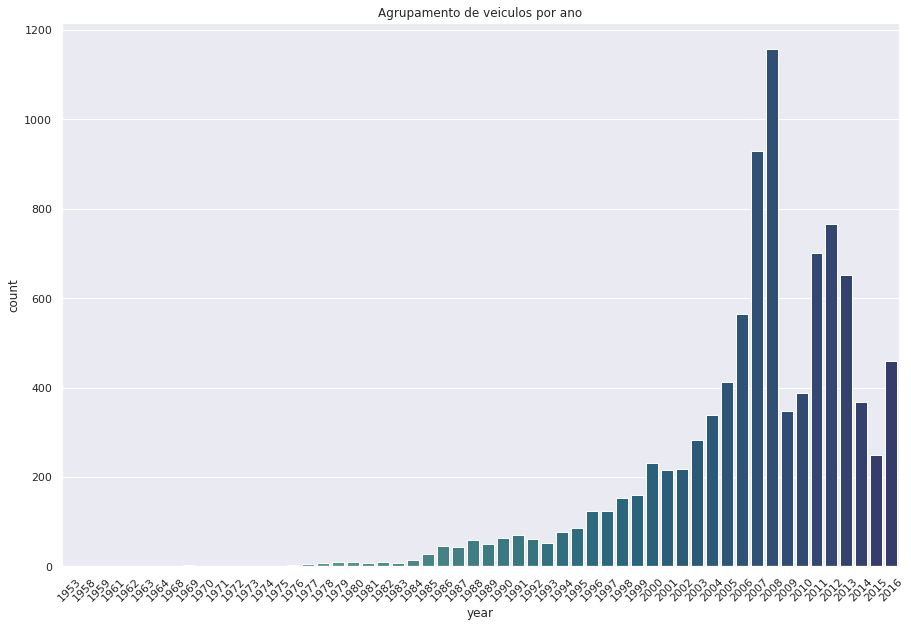

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x='year', data=df, palette='crest')
plt.xticks(rotation=45);
plt.title('Agrupamento de veiculos por ano');

Observe a alta gradativa que se concede a partir do ano de 2003, e logo após, a queda brusca entre 2008 e 2009.

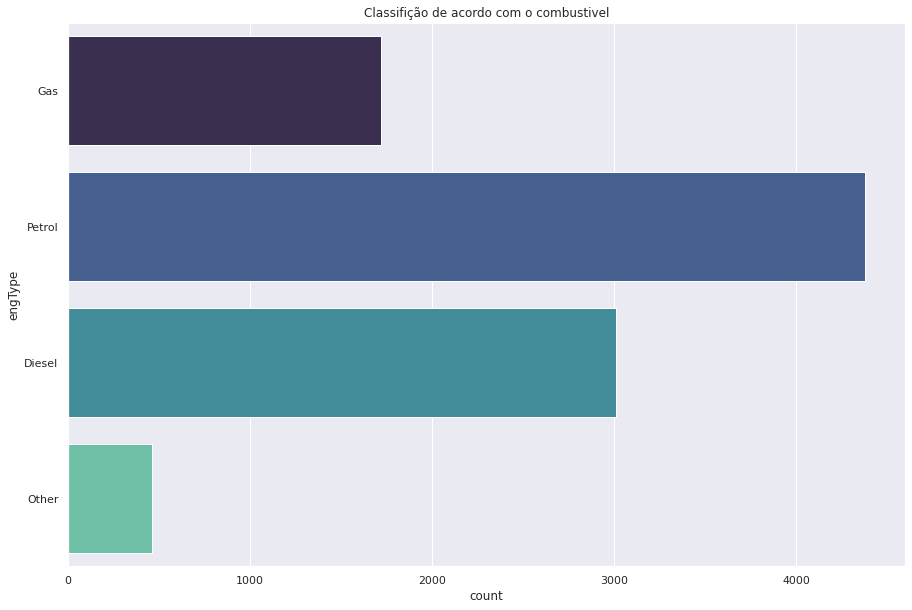

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(y='engType', data=df, palette='mako' )
plt.title('Classifição de acordo com o combustivel');

Podemos ver que o maior número de carros usa Gasolina como combustivel. Logo após, temos Diesel e Gás. No item 'Other', poderia incluir carros elétricos, mas como não temos esse detalhamento, melhor desconsiderar.

Text(0.5, 1.0, 'Relação Ano X Preço X Motor')

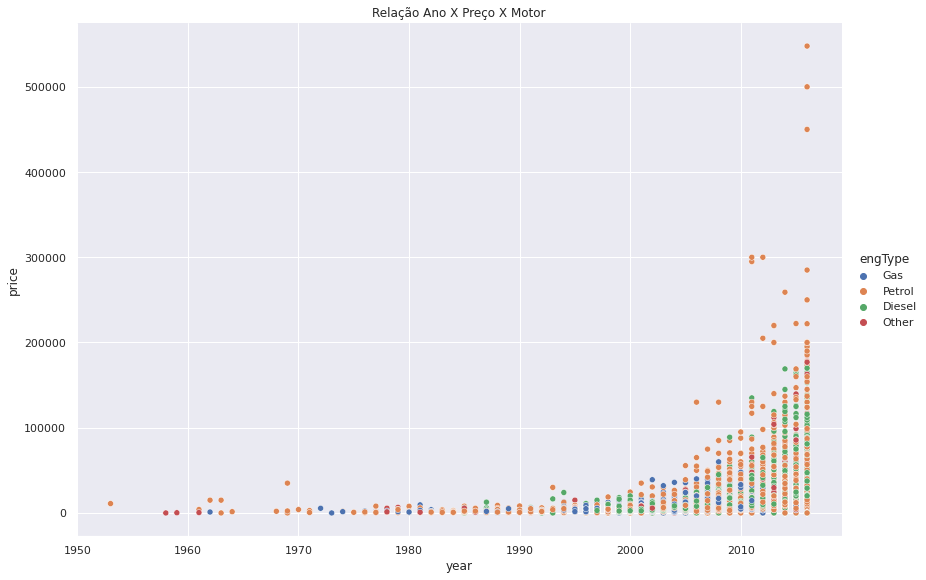

In [ ]:
sns.relplot(x='year', y='price', hue='engType', data=df, height=8, aspect=1.5)
plt.title('Relação Ano X Preço X Motor')

Aqui temos uma noção mais clara da concentração de veiculos movidos à gasolina.

#Por fim

Podemos notar que, com poucas linhas de código, foi possível extrair algumas informações simples, no entanto muito claras: 

1.   Carros mais novos geralmente são mais caros, tendo alguns Outliers desde o início dos anos 2000.

2.   Os veículos do tipo CrossOver e Sedan são, geralmente, mais caros que os de outro tipo de carroceria.

3.   Entre os anos de 2008 e 2009, houve uma queda brusca na produção de automoveis. 
  Um reflexo direto da Bolha imobiliaria, que assolou não só os Estados Unidos, mas toda a economia mundial.

4.   E por fim, constatamos que os motores movidos à gasolina são de longe os mais utilizados.






Essa foi minha primeira análise de dados, então espero que tenha lido até aqui e gostado do conteúdo.